# Описание проекта 

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Подготовка данных <a id='1'></a>

Производим импорт **библиотек**.

In [1]:
import pandas as pd 
import numpy as np 
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Записываем в переменную **csv-файл**.

In [2]:
try:
    data = pd.read_csv('C:/Users/User/Desktop/Проекты/Сборный проект №1/games.csv')
except:
    try:
        data = pd.read_csv('C:/Users/JERR/Desktop/Проекты/Сборный проект №1/games.csv')
    except:
        data = pd.read_csv('/datasets/games.csv')

Откроем **общую информацию** по датафрейму.

In [3]:
def info(data):
    display(data.head(5))
    print('\033[1m Название столбцов \033[0m')
    print()
    print(data.columns)
    data.info()

In [4]:
info(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


 Название столбцов 

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Опишем название столбцов.**

* `Name` — название игры

* `Platform` — платформа

* `Year_of_Release` — год выпуска

* `Genre` — жанр игры

* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)

* `EU_sales` — продажи в Европе (миллионы проданных копий)

* `JP_sales` — продажи в Японии (миллионы проданных копий)

* `Other_sales` — продажи в других странах (миллионы проданных копий)

* `Critic_Score` — оценка критиков (максимум 100)

* `User_Score` — оценка пользователей (максимум 10)

* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Природа пропусков 

Выведим **количество пропусков** по столбцам.

In [5]:
print(data.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


Видно, что **небольшое количество пропусков у трех столбцов**: `Name`, `Year_of_Release` и `Genre`. Проверим пропуски в этих столбцах.

### Природа пропусков у столбцов Name и Genre

In [6]:
display(data.loc[data['Name'].isna() == True])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце `Name` с пропущенным значениями видно, что также присутствуют два пропуска в столбце `Genre`. Природу такого пропуска оценить сложно, так у данных строчек отсутствуют важная информация, а совпадение в данных по столбцам `Platform` и `Year_of_Release` указывают на возможный сбой.

### Природа пропуска у столбца Year_of_Release

In [7]:
year_of_release = data.loc[data['Year_of_Release'].isna() == True]

In [8]:
display(year_of_release.head(5))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [9]:
display(data.loc[data.index == 1650])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.6,0.46,0.0,0.16,84.0,8.7,E


Наблюдаем, что строки наполнены данными. **Также важно: видно в названии игры год. Можно предположить, что этот год как раз и является годом создания игры (релиза).**

In [10]:
for year in range(int(data['Year_of_Release'].min()), int(data['Year_of_Release'].max() + 1)):
    year = str(year)
    missing_value = year_of_release[year_of_release['Name'].str.contains(year,
                                                                         na=False)].index
    if len(missing_value) > 0:     
        for index_ in missing_value:
            data.loc[data.index == index_, 'Year_of_Release'] = year

In [11]:
display(data.loc[data.index == 1650])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1650,NASCAR Thunder 2003,PS2,2003,Racing,0.6,0.46,0.0,0.16,84.0,8.7,E


Если в названии был год, то автоматически год перенесен в столбце `Year_of_Release`.

### Природа пропусков у столбцов Critic_Score и User_Score

У данных столбцов присутствует **значительная доля пропусков.** 

In [12]:
data['Critic_Score'].value_counts(dropna=False)

NaN     8578
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
20.0       3
13.0       1
17.0       1
22.0       1
21.0       1
Name: Critic_Score, Length: 83, dtype: int64

In [13]:
data['User_Score'].value_counts(dropna=False)

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
0.9       2
1         2
0.7       2
9.7       1
0         1
Name: User_Score, Length: 97, dtype: int64

У столбца `Critic_Score` **определено 8578 NaN**, у столбца `User_Score` **определено 6701 NaN и 2424 tbd**. Выведим строки со значением tbd.

In [14]:
display(data.loc[data['User_Score'] == 'tbd'].head(5))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


### Природа пропуска у столбца Rating

In [15]:
display(data.loc[data['Rating'].isna() == True].head(5))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [16]:
data['Rating'].value_counts(dropna=False)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

У столбца **Rating определено 6766 NaN.**

### Вывод

Природа пропусков у столбцов `Name` и `Genre` **предположительно связана с каким-либо сбоем**, а также количество пропусков равно двум, поэтому от этим строчек можно **избавиться.** 

Некоторые пропуски в столбце `Year_of_Release` **можно заполнить**, есть в столбце Name (в названии игры) **есть год**. Другие пропуски можно удалить.

Природа пропусков у столбцов `Critic_Score` и `User_Score` **довольна сложна объяснима.** Пропуски с NaN можно заполнить заглушкой равной -1. Пропуск tbd имеет другой тип данных (строковый), поэтому его необходимо использовать другой метод, отличный от целочисленных методов. 

В столбце `Rating` пропуски с NaN можно **заполнить значением 'Unknown'.**

Видно, что некоторые данные не полные, поэтому на данном этапе запомним это, а на этапе предобработке данных решим как необходимо поступить.

## Предобработка данных <a id='2'></a>

На данном этапе необходимо разобраться с **данными для исследовательского анализа**. Убрать пустые значение в столбцах `Critic_Score` и `User_Score` не является разумным, т.к. удалятся половина датафрейма, поэтому **пометим их меткой.**

In [17]:
data['Critic_Score'] = data['Critic_Score'].fillna(-1)
data['User_Score'] = data['User_Score'].fillna(-1)
data['Rating'] = data['Rating'].fillna('Unknown')

### Исследование столбца User_Score

Выведим **уникальные значения столбца** `User_Score`.

In [18]:
data['User_Score'].value_counts()

-1     6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.9       2
1.1       2
0.5       2
0         1
9.7       1
Name: User_Score, Length: 97, dtype: int64

Видим, что помимо поставленной метки, столбец имеет **неизвественное значение 'tbd'**, поэтому на него тоже **поставим метку.** 

In [19]:
data.loc[data['User_Score'] == "tbd", 'User_Score'] = -1

Проверим данную операцию.

In [20]:
data['User_Score'].value_counts()

-1     9125
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
1.1       2
0.5       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

### Исследование столбца Critic_Score

Выведим **уникальные значения** столбца `Critic_Score`.

In [21]:
data['Critic_Score'].value_counts()

-1.0     8578
 70.0     256
 71.0     254
 75.0     245
 78.0     240
         ... 
 20.0       3
 13.0       1
 17.0       1
 22.0       1
 21.0       1
Name: Critic_Score, Length: 83, dtype: int64

### Исследование столбца Rating

Выведим **уникальные значения** столбца `Rating`.

In [22]:
data['Rating'].value_counts()

Unknown    6766
E          3990
T          2961
M          1563
E10+       1420
EC            8
RP            3
K-A           3
AO            1
Name: Rating, dtype: int64

Пометим данные RP **меткой Unknown**, а K-A, EC и AO **меткой E.**

In [23]:
data.loc[data['Rating'] == "RP", 'Rating'] = 'Unknown'
data.loc[data['Rating'] == "K-A", 'Rating'] = 'E'
data.loc[data['Rating'] == "EC", 'Rating'] = 'E'
data.loc[data['Rating'] == "AO", 'Rating'] = 'E'

Проверим.

In [24]:
data['Rating'].value_counts()

Unknown    6769
E          4002
T          2961
M          1563
E10+       1420
Name: Rating, dtype: int64

### Подготовка данных 

Удалим **пропущенные значения.**

In [25]:
size_before = data.shape
print('Размер датафрейма до удаления', size_before)
data = data.dropna(subset=['Name', 'Year_of_Release','Genre'])
size_after = data.shape
print('Размер датафрейма после удаления', size_after)

Размер датафрейма до удаления (16715, 11)
Размер датафрейма после удаления (16461, 11)


In [26]:
r = round((size_before[0] - size_after[0]) / size_before[0] * 100)
print(f'Потерянных данных из-за удаления пропусков в столбце Year_of_Release равно {r}%.')

Потерянных данных из-за удаления пропусков в столбце Year_of_Release равно 2%.


**Преобразуем данные в числовой тип.**

In [27]:
data['Critic_Score'] = data['Critic_Score'].astype('int64')
data['User_Score'] = pd.to_numeric(data['User_Score'], errors='coerce')
data['Year_of_Release'] = data['Year_of_Release'].astype('int64')

Проверим дубликаты.

In [28]:
data.loc[data.duplicated(subset=['Name','Platform','Year_of_Release','Genre'], keep = False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


Природу такого дубликата выяснить довольно сложно, но очевидно что это дубликат. **Удаляем его.**

In [29]:
data = data.drop(index=[16230]).reset_index(drop=True)

Преобразуем столбцы **к нижнему регистру.**

In [30]:
data.columns = data.columns.str.lower()

Выведим информацию.

In [31]:
info(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,Unknown


 Название столбцов 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16460 entries, 0 to 16459
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16460 non-null  object 
 1   platform         16460 non-null  object 
 2   year_of_release  16460 non-null  int64  
 3   genre            16460 non-null  object 
 4   na_sales         16460 non-null  float64
 5   eu_sales         16460 non-null  float64
 6   jp_sales         16460 non-null  float64
 7   other_sales      16460 non-null  float64
 8   critic_score     16460 non-null  int64  
 9   user_score       16460 non-null  float64
 10  rating           16460 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


### Подготовка данных (выборка)

Когда установлены метки, можно создать **новый датафрейм без меток.**

In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [33]:
data_processed = data.loc[(data['critic_score'] != '-1') & (data['user_score'] != '-1')]

data_processed = data_processed.loc[data_processed['rating'] != 'Unknown']

**Проверим, что рейтинг не выходит за границы** - для `Critic_Score` от 0 до 100, а для `User_Score` от 0 до 10.

In [34]:
data_processed = data_processed.loc[data_processed['critic_score'] >= 0]
data_processed = data_processed.loc[data_processed['critic_score'] <= 100]

data_processed = data_processed.loc[data_processed['user_score'] >= 0]
data_processed = data_processed.loc[data_processed['user_score'] <= 10]

**Выведим информацию по выборке.**

In [35]:
info(data_processed)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E


 Название столбцов 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6833 entries, 0 to 16447
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6833 non-null   object 
 1   platform         6833 non-null   object 
 2   year_of_release  6833 non-null   int64  
 3   genre            6833 non-null   object 
 4   na_sales         6833 non-null   float64
 5   eu_sales         6833 non-null   float64
 6   jp_sales         6833 non-null   float64
 7   other_sales      6833 non-null   float64
 8   critic_score     6833 non-null   int64  
 9   user_score       6833 non-null   float64
 10  rating           6833 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 640.6+ KB


### Вывод (выборка)

В результате нескольких операций, видно что созданный датафрейм не имеет пропусков, типы данных в норме. Но все же это некая выборка (50% об общих данных) из генеральной совокупности.

## Исследовательский анализ данных <a id='3'></a>

### Суммарные продажи

Посчитаем **суммарные продажи во всех регионах** и запишем их в отдельный столбец.

In [36]:
data['tolal_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')

### Группировка

Посмотрим, сколько игр выпускалось в разные годы. **Поэтому произведем группировку.**

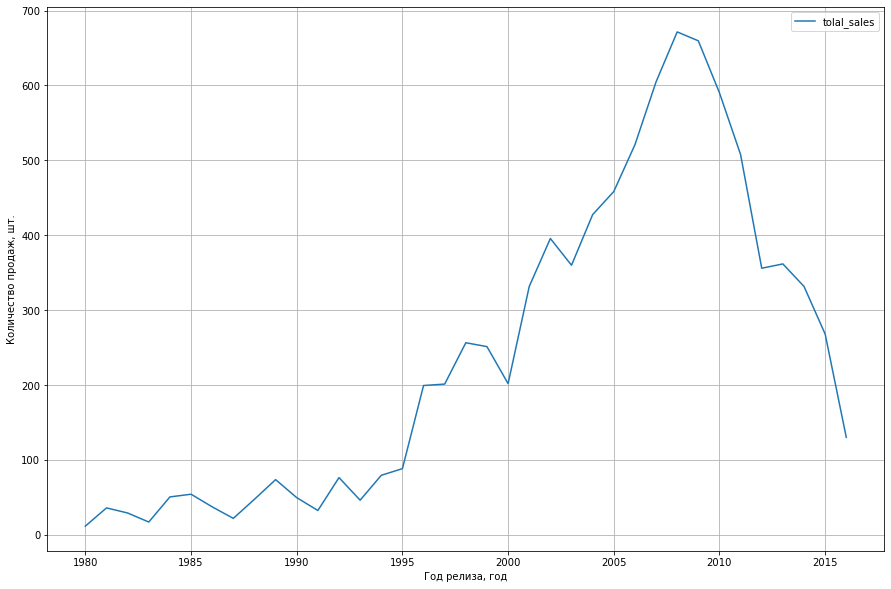

In [37]:
(data
 .pivot_table(index='year_of_release',values='tolal_sales',aggfunc='sum')
 .plot(grid = True, figsize=[15, 10]));
plt.xlabel("Год релиза, год");
plt.ylabel("Количество продаж, шт.");

Видим **диапазон игр с 1980 по 2016 года**. Каждый год важен - мы можем отследить динамику повышения/уменьшения количества выпускаемых игр по годам. Также подчеркнем, **что с 2008 года количество выпускаемых игр наоборот идет на снижение.**

In [38]:
class information():
    
    def __init__(self, data):
        #Передаем в класс information датафрейм
        self.data = data
        
        #Создаем датафрейм
        self.platform = (self.data
                    .pivot_table(index='platform',
                                 values='tolal_sales',
                                 aggfunc='sum')
                    .sort_values('tolal_sales', 
                                 ascending = False))
        
        #Переименовываем столбец 
        self.platform.columns = ['Сумма продаж']
        
        #Минимальный и максимальный год
        
        self.min_year = data['year_of_release'].min()
        self.max_year = data['year_of_release'].max()
        
        #Сохраняем индексы (Глобальные)
        self.platform_index = self.platform.index
        
    def top(self, count_top):\
        
        #Топ платформ
        top_index = self.platform_index[:count_top]
         
        #Датафрейм по количеству продаж по платформам и годам.
        self.data_new = (self.data.query('platform in @top_index')
                         .pivot_table(index=['year_of_release', 'platform'], 
                                      values='tolal_sales', 
                                      aggfunc = 'sum')
                         .sort_values('tolal_sales', 
                                      ascending = False)).reset_index()
        
        #Датафреймы по платформам
        data_breakdown = {f'data_platform_{variable}': 
                          self.data_new.loc[self.data_new['platform'] == variable] 
                          for variable in top_index}
        
        #Ключи топ платформ
        keys = list(data_breakdown.keys())
        
        #Группировка максимальных значений
        #Группировка первых двух таблиц
        group = (data_breakdown[keys[0]].head(1)
                 .merge(data_breakdown[keys[1]].head(1), 
                        on = ['year_of_release', 'platform', 'tolal_sales'], 
                        how='outer'))
        
        #Группировка остальных таблиц
        for count in keys[2:]:
            group = group.merge(data_breakdown[count].head(1), 
                                on = ['year_of_release', 'platform', 'tolal_sales'], 
                                how='outer')
            
            group = group.sort_values('tolal_sales', ascending = False).reset_index(drop=True)
            
        #Вывод функции
        return self.platform.head(count_top), self.data_new, keys, data_breakdown, group
    
    def graphics_top(self):
        (information(self.data).top(5)[4][['platform', 'tolal_sales']]
         .plot(x='platform', 
               y='tolal_sales', 
               style='o',
               grid=True,
               figsize=[10, 5]));
        
        plt.xlabel("Платформа");
        plt.ylabel("Количество продаж, шт.");
        
    def graphics_shared(self):
        
        legend_list = []
        index = information(self.data).top(5)[2] 
        first_index = index[0]        
        legend_list.append(first_index)
        ax = (information(self.data).top(5)[3][first_index]
              .pivot_table(index='year_of_release', 
                           values='tolal_sales', 
                           aggfunc = 'sum')
              .plot(grid=True, 
                    label=first_index));
    
        for other_index in index[1:]:
            ax = (information(self.data).top(5)[3][other_index]
                  .pivot_table(index='year_of_release', 
                               values='tolal_sales', 
                               aggfunc = 'sum')
                  .plot(grid=True, 
                        ax=ax, 
                        label=other_index,
                        figsize=[15, 10]));
            legend_list.append(other_index)
  
        ax.legend(legend_list);  
        plt.xlabel("Год");
        plt.ylabel("Количество продаж, шт.");
        return ax
    
    def duration(self):
        for index in information(self.data).top(5)[1]['platform'].unique():
            year = (self.data['year_of_release'].loc[self.data['platform'] == index].max() - 
                    self.data['year_of_release'].loc[self.data['platform'] == index].min())
            print(f'Средний срок жизни платформы {index} равен {year} годам.')

Посмотрим, как менялись продажи по платформам. Выберем **платформы с наибольшими суммарными продажами** и построим распределение по годам. 

В методе `top()` указываем количество топов в списке.

In [39]:
sales_amount, year_sales, variables, data_platform,  maximum_sales = information(data).top(5)

In [40]:
display(sales_amount)

,Сумма продаж
platform,
PS2,1247.28
X360,961.30
PS3,931.33
Wii,891.18
DS,802.79


Датафрейм для ответа на вопрос
**на какой год приходятся наибольшие количество продаж по платформам.**

In [41]:
display(year_sales.head(10))

,year_of_release,platform,tolal_sales
0,2004,PS2,220.55
1,2009,Wii,206.97
2,2002,PS2,205.38
3,2003,PS2,185.93
4,2008,Wii,171.32
5,2010,X360,170.03
6,2001,PS2,166.43
7,2005,PS2,160.98
8,2011,PS3,156.78
9,2007,Wii,152.77


Производим разбивку датафрейма на датафреймы по платформам.  

**Название переменных:**

In [42]:
display(variables)

['data_platform_PS2',
 'data_platform_X360',
 'data_platform_PS3',
 'data_platform_Wii',
 'data_platform_DS']

**Объединяем группы** для выявления года с максимальной продажей по платформам.

In [43]:
display(maximum_sales)

,year_of_release,platform,tolal_sales
0,2004,PS2,220.55
1,2009,Wii,206.97
2,2010,X360,170.03
3,2011,PS3,156.78
4,2007,DS,146.94


In [44]:
display(data_platform)

{'data_platform_PS2':     year_of_release platform  tolal_sales
 0              2004      PS2       220.55
 2              2002      PS2       205.38
 3              2003      PS2       185.93
 6              2001      PS2       166.43
 7              2005      PS2       160.98
 25             2006      PS2       106.46
 30             2007      PS2        75.99
 33             2008      PS2        53.90
 36             2000      PS2        39.17
 38             2009      PS2        26.40
 48             2010      PS2         5.64
 54             2011      PS2         0.45,
 'data_platform_X360':     year_of_release platform  tolal_sales
 5              2010     X360       170.03
 12             2011     X360       143.89
 15             2008     X360       135.26
 19             2009     X360       120.29
 26             2012     X360        99.74
 27             2007     X360        95.42
 28             2013     X360        88.58
 34             2006     X360        51.62
 37       

Выведим графически максимальное количество продаж за все года по платформам.

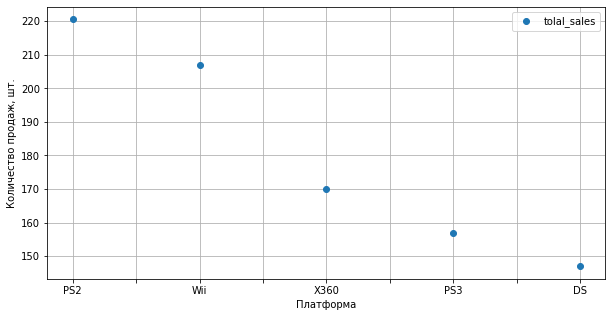

In [45]:
information(data).graphics_top()

Посмотрим, как **менялись количество продаж по платформам** (по отдельности) **за весь наблюдаемый период.**

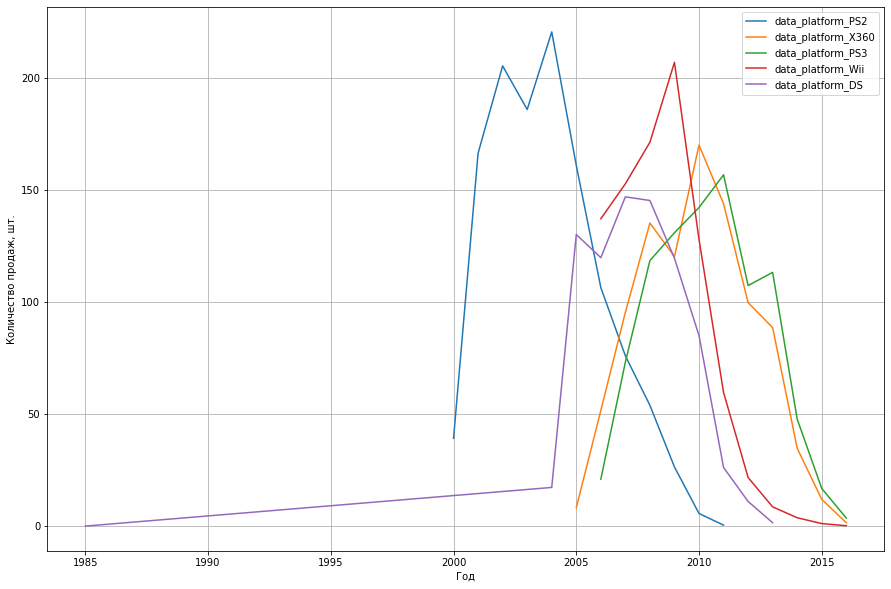

In [46]:
information(data).graphics_shared();

In [47]:
display(data.loc[(data['year_of_release'] == 1985) & (data['platform'] == 'DS')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tolal_sales
15719,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,-1.0,Unknown,0.02


**Удалим артефакт.**

In [48]:
data = data.drop(index=data.loc[(data['year_of_release'] == 1985) & (data['platform'] == 'DS')].index).reset_index(drop=True)

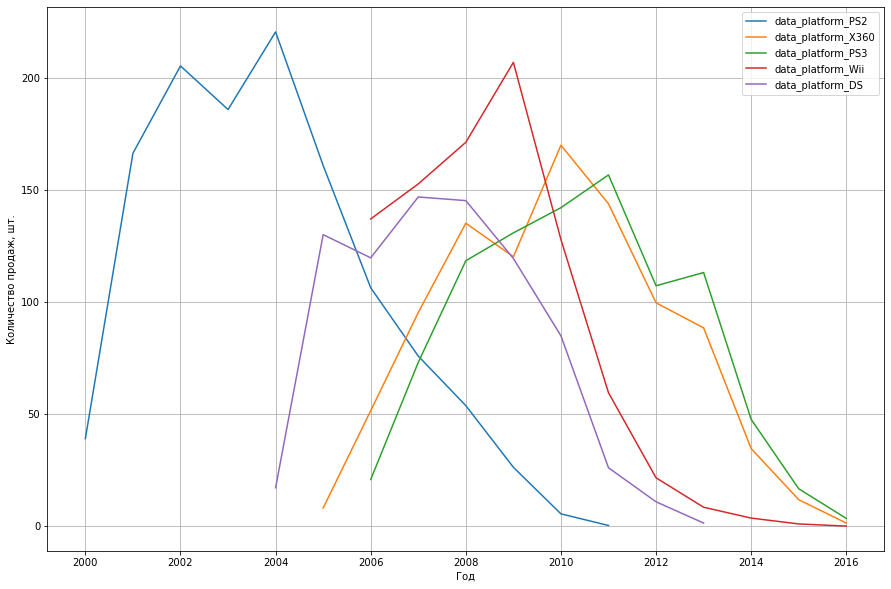

In [49]:
information(data).graphics_shared();

**Опишим преимущество продаж по годам.**

* 2000 - 2005 = `PS2`
* 2006 = `DS`
* 2007 - 2009 = `Wii`
* 2009 - 2011 = `X360`
* 2011 - 2016 = `PS3`

На 2016 год видно, что платформы PS2 и DS перестали осуществлять продажи. **Но это только платформы за весь период и не учитываются новые платформы созданные относительно недавно, поэтому логично рассмотреть актуальный период.**

### Cредний срок жизни платформы

In [50]:
information(data).duration();

Средний срок жизни платформы PS2 равен 11 годам.
Средний срок жизни платформы Wii равен 10 годам.
Средний срок жизни платформы X360 равен 11 годам.
Средний срок жизни платформы PS3 равен 10 годам.
Средний срок жизни платформы DS равен 9 годам.


**Возьмём данные за соответствующий актуальный период.** Актуальный период 2013 - 2016 для того, чтобы построить прогноз на 2017 год.

### Актуальный период

In [51]:
current_period = data[data['year_of_release'] >= 2013]

In [52]:
sales_amount_period, year_sales_period, variables_period, data_platform_period, maximum_sales_period = (information(current_period)
                                                                                                        .top(5))

In [53]:
display(sales_amount_period)

,Сумма продаж
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


In [54]:
display(year_sales_period.head(10))

,year_of_release,platform,tolal_sales
0,2015,PS4,118.90
1,2013,PS3,113.25
2,2014,PS4,100.00
3,2013,X360,88.58
4,2016,PS4,69.25
5,2015,XOne,60.14
6,2013,3DS,56.57
7,2014,XOne,54.07
8,2014,PS3,47.76
9,2014,3DS,43.76


In [55]:
display(variables_period)

['data_platform_PS4',
 'data_platform_PS3',
 'data_platform_XOne',
 'data_platform_3DS',
 'data_platform_X360']

In [56]:
display(data_platform_period)

{'data_platform_PS4':     year_of_release platform  tolal_sales
 0              2015      PS4       118.90
 2              2014      PS4       100.00
 4              2016      PS4        69.25
 13             2013      PS4        25.99,
 'data_platform_PS3':     year_of_release platform  tolal_sales
 1              2013      PS3       113.25
 8              2014      PS3        47.76
 15             2015      PS3        16.82
 18             2016      PS3         3.60,
 'data_platform_XOne':     year_of_release platform  tolal_sales
 5              2015     XOne        60.14
 7              2014     XOne        54.07
 12             2016     XOne        26.15
 14             2013     XOne        18.96,
 'data_platform_3DS':     year_of_release platform  tolal_sales
 6              2013      3DS        56.57
 9              2014      3DS        43.76
 11             2015      3DS        27.78
 16             2016      3DS        15.14,
 'data_platform_X360':     year_of_release platform

In [57]:
display(maximum_sales_period)

,year_of_release,platform,tolal_sales
0,2015,PS4,118.90
1,2013,PS3,113.25
2,2013,X360,88.58
3,2015,XOne,60.14
4,2013,3DS,56.57


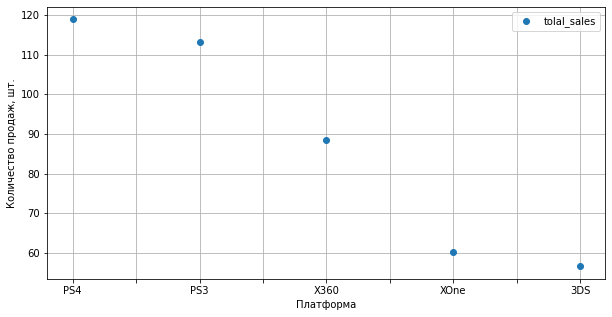

In [58]:
information(current_period).graphics_top()

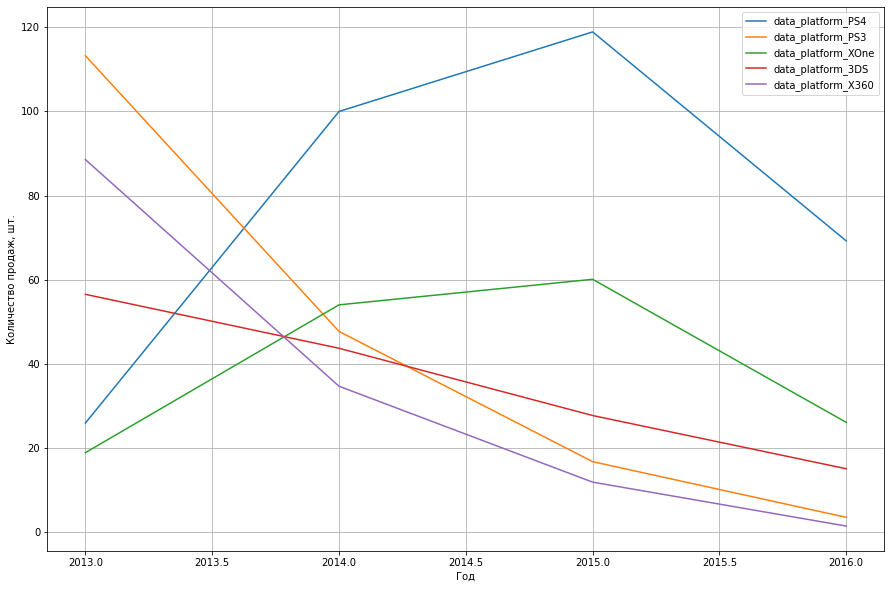

In [59]:
information(current_period).graphics_shared();

Наблюдаем общее снижение количество продаж c 2015 года. Платформы **PS3 и X360 имеют минимальные продажи** и в скором времени продажи достигнут **нуля.**

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам 

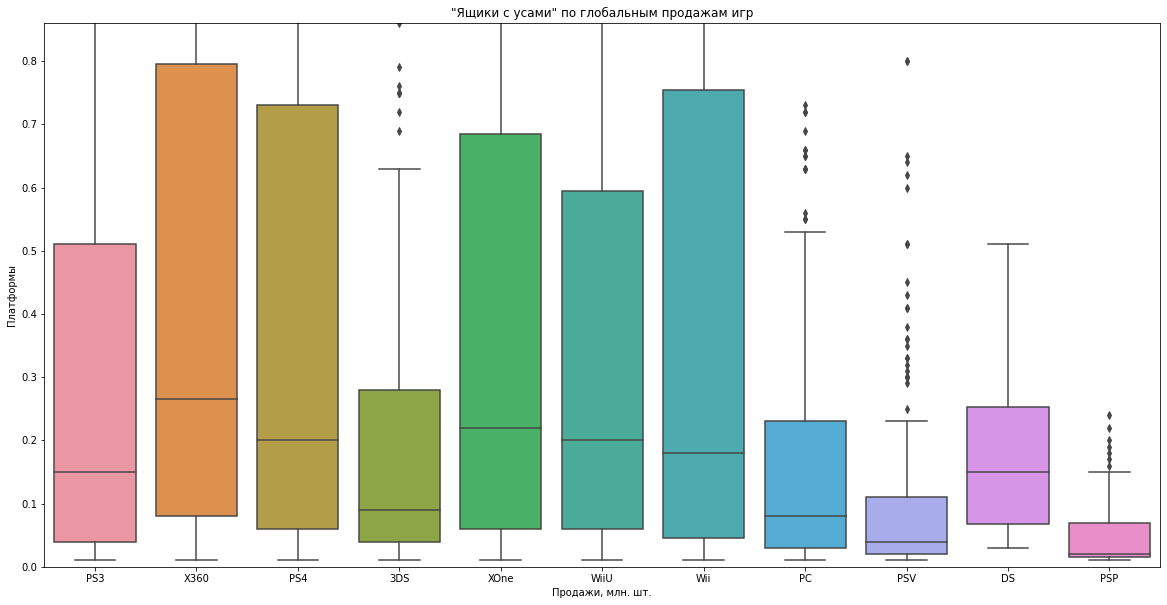

In [60]:
plt.figure(figsize=(20, 10))

sns.boxplot(data=current_period, x='platform', y='tolal_sales')

plt.ylim(0, .86)

plt.title('"Ящики с усами" по глобальным продажам игр')
plt.xlabel('Продажи, млн. шт.')
plt.ylabel('Платформы')

plt.show()

### Корреляция

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [61]:
data_kr = current_period.loc[current_period['critic_score'] >= 0]
data_kr = data_kr.loc[data_kr['critic_score'] <= 100]

data_kr = data_kr.loc[data_kr['user_score'] >= 0]
data_kr = data_kr.loc[data_kr['user_score'] <= 10]

In [62]:
def graph_korr(data, index_platform):
    for index in index_platform:
        data_score = data.query('platform == @index')
        data_score.plot(x='user_score', 
                        y='critic_score', 
                        kind='scatter', 
                        grid=True, 
                        figsize=(15, 10))

        plt.xlabel("Пользовательские оценки");
        plt.ylabel("Оценки критиков");
        
        correlation = round(data_score['user_score'].corr(data_score['critic_score']), 2)

        print(f'Корреляция {index} равна {correlation}')

Корреляция PS4 равна 0.56
Корреляция PS3 равна 0.6
Корреляция XOne равна 0.47
Корреляция 3DS равна 0.77
Корреляция X360 равна 0.52


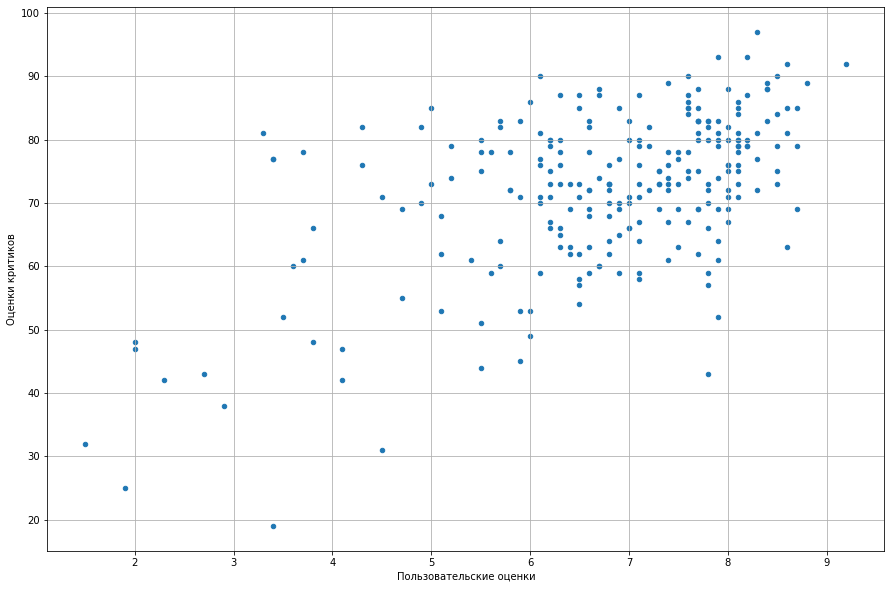

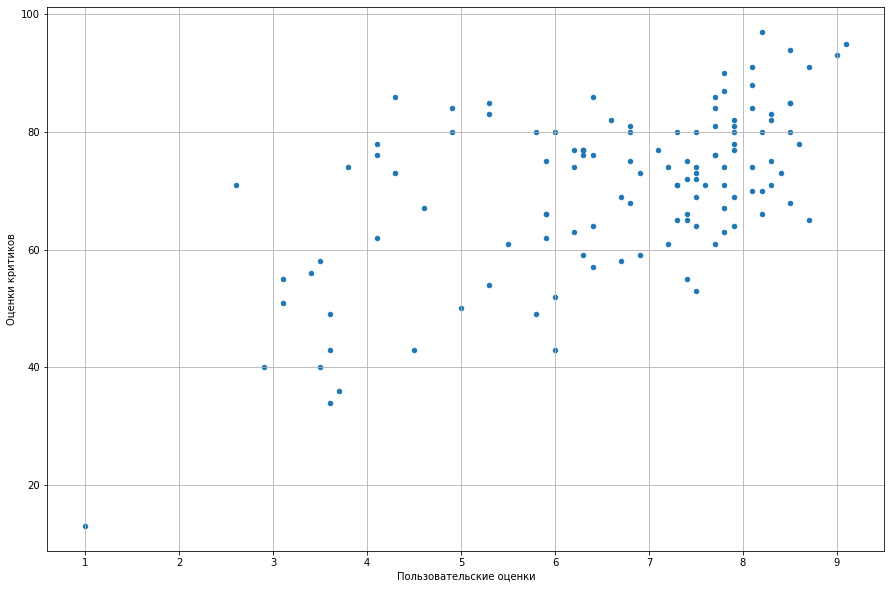

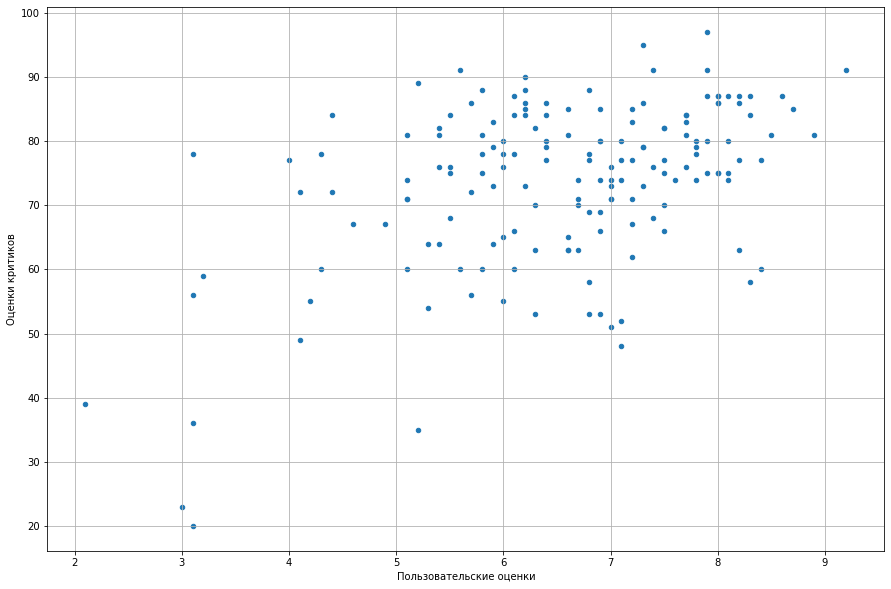

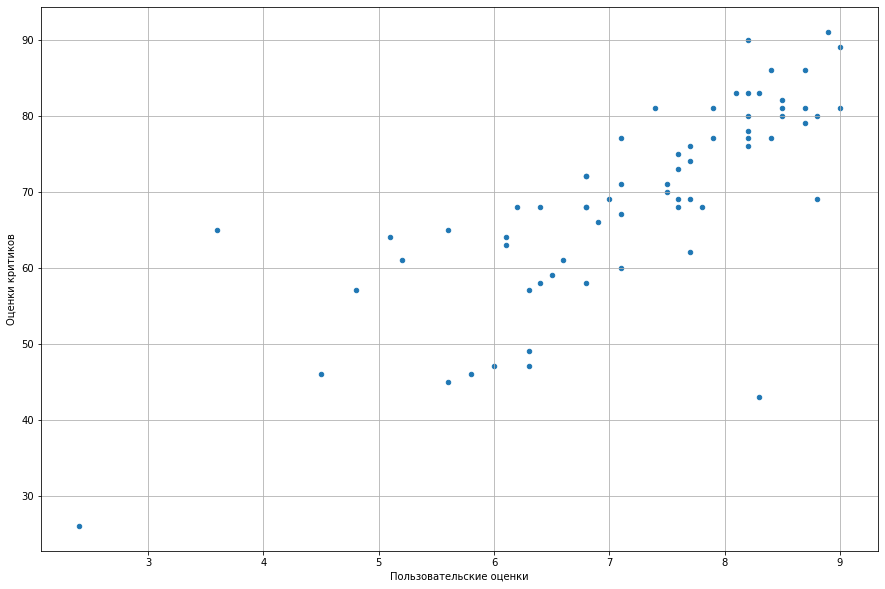

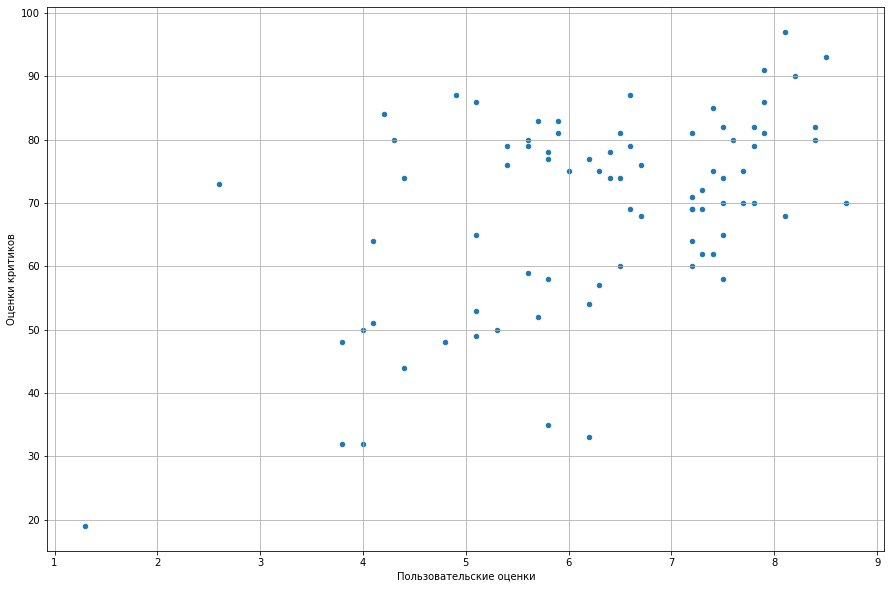

In [63]:
graph_korr(data_kr, sales_amount_period.index)

**Вывод: у всех положительная корреляция - чем выше пользовательские оценки, тем выше оценки критиков.**

### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам.

In [64]:
def distribution(index, values, label):
    (current_period
     .pivot_table(index=index,
                  values=values,
                  aggfunc='median')
     .sort_values(values, 
                  ascending = False)
     .plot(grid=True,
           figsize=(15, 10)));

    plt.xlabel(label);

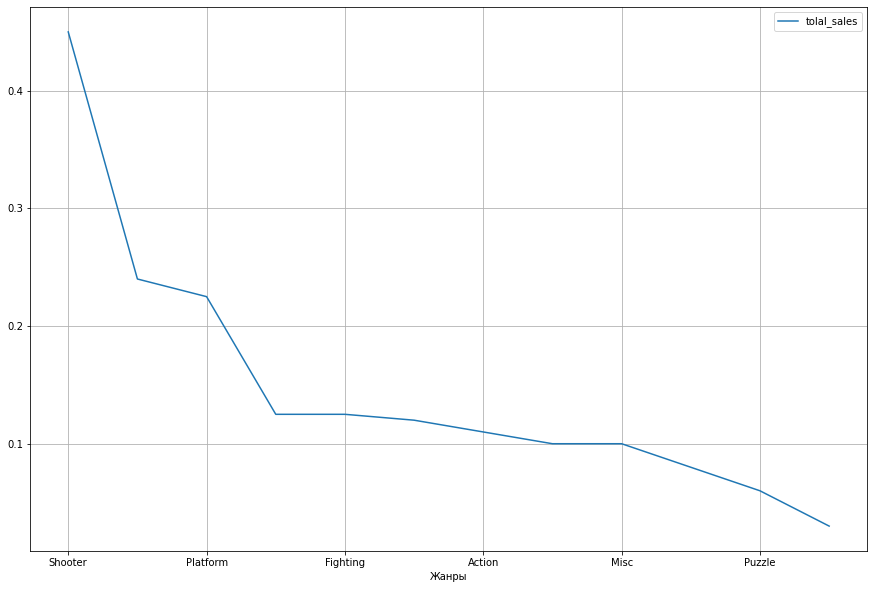

In [65]:
distribution('genre', 'tolal_sales', "Жанры")

# Портрет пользователя каждого региона <a id='4'></a>

## Самые популярные платформы (топ-5).

In [66]:
def distribution_top(index, values, label):
    (current_period
     .pivot_table(index=index,
                  values=values,
                  aggfunc='median')
     .sort_values(values, 
                  ascending = False).head(5)
     .plot(grid=True,
           figsize=(15, 10)));

    plt.xlabel(label);

In [91]:
variable_platform = 'platform'
variable_genre = 'genre'
variable_rating = 'rating'
variable_label_p = "Платформа"
variable_label_g = "Жанры"
variable_label_r = "Рейтинг"

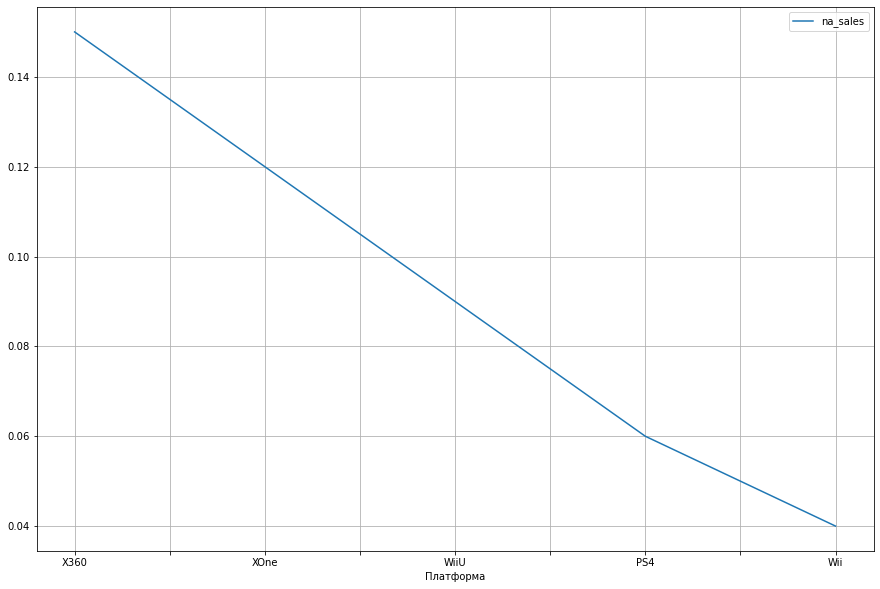

In [68]:
distribution_top(variable_platform, 'na_sales', variable_label_p)

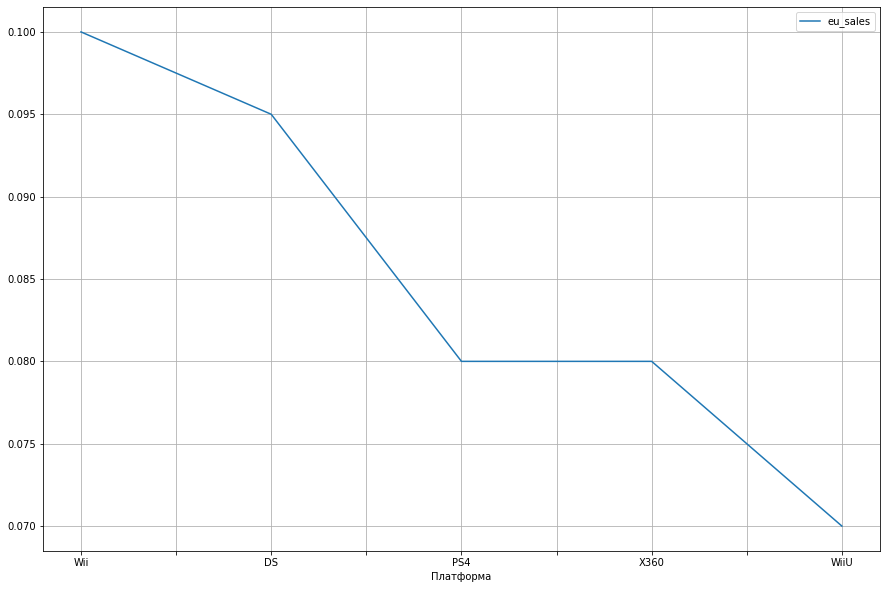

In [69]:
distribution_top(variable_platform, 'eu_sales', variable_label_p)

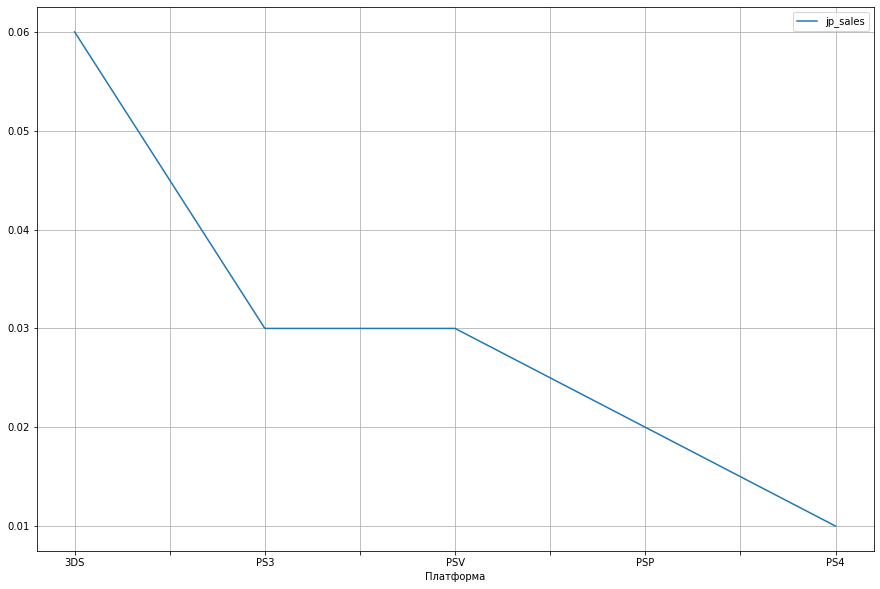

In [70]:
distribution_top(variable_platform, 'jp_sales', variable_label_p)

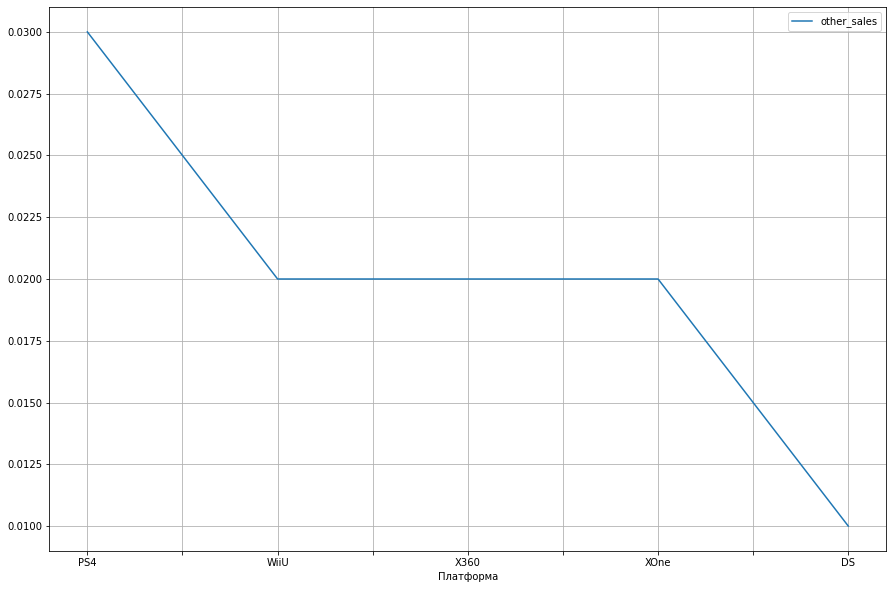

In [71]:
distribution_top(variable_platform, 'other_sales', variable_label_p)

Видим, что в каждом регионе своя популярная платформа.

## Самые популярные жанры (топ-5)

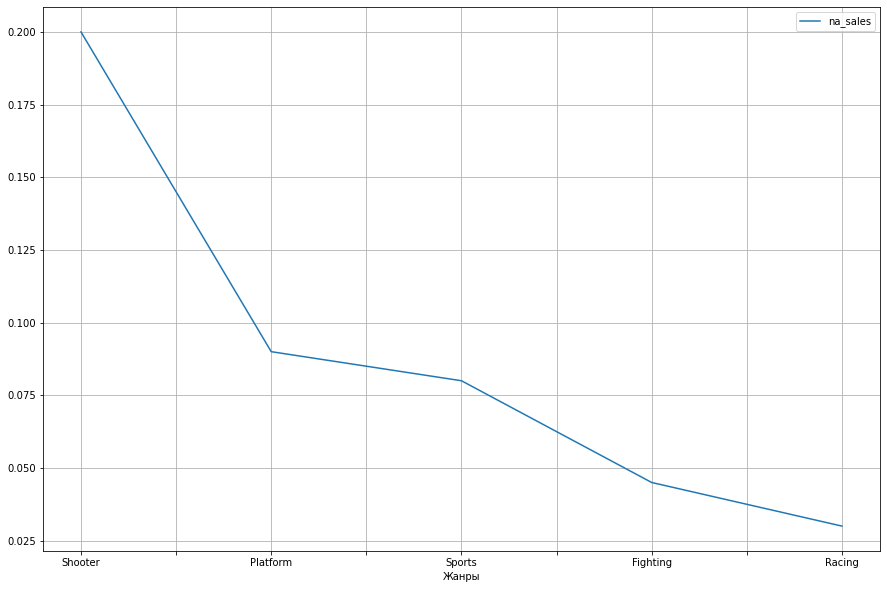

In [86]:
distribution_top(variable_genre, 'na_sales', variable_label_g)

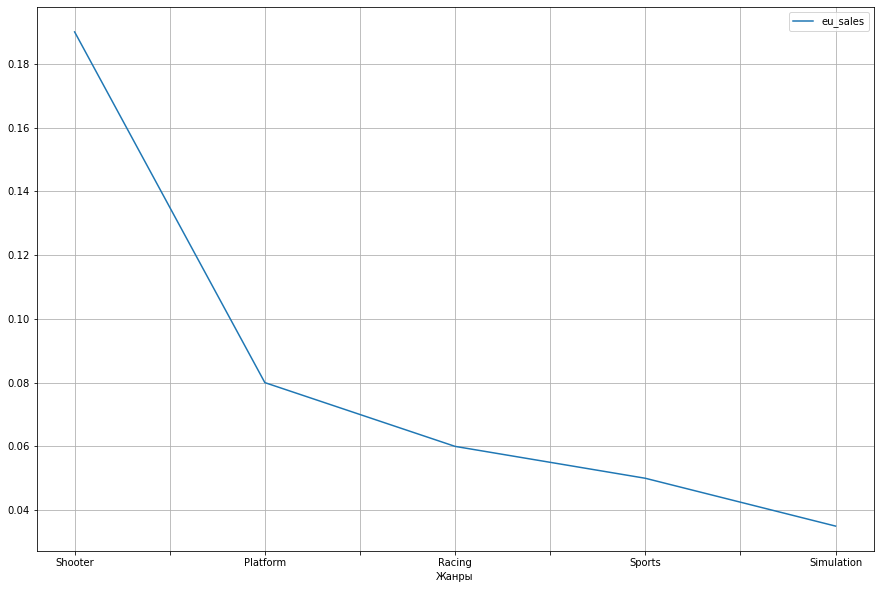

In [87]:
distribution_top(variable_genre, 'eu_sales', variable_label_g)

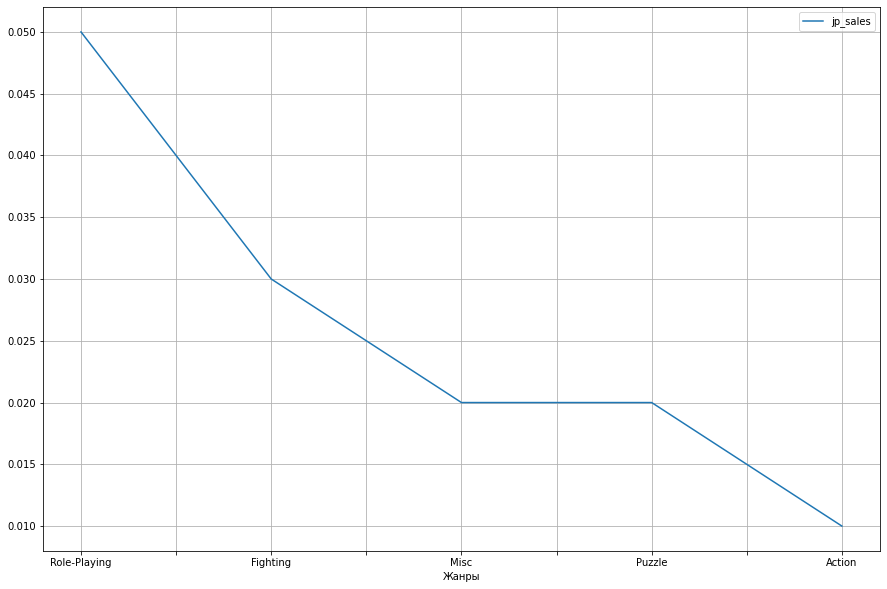

In [88]:
distribution_top(variable_genre, 'jp_sales', variable_label_g)

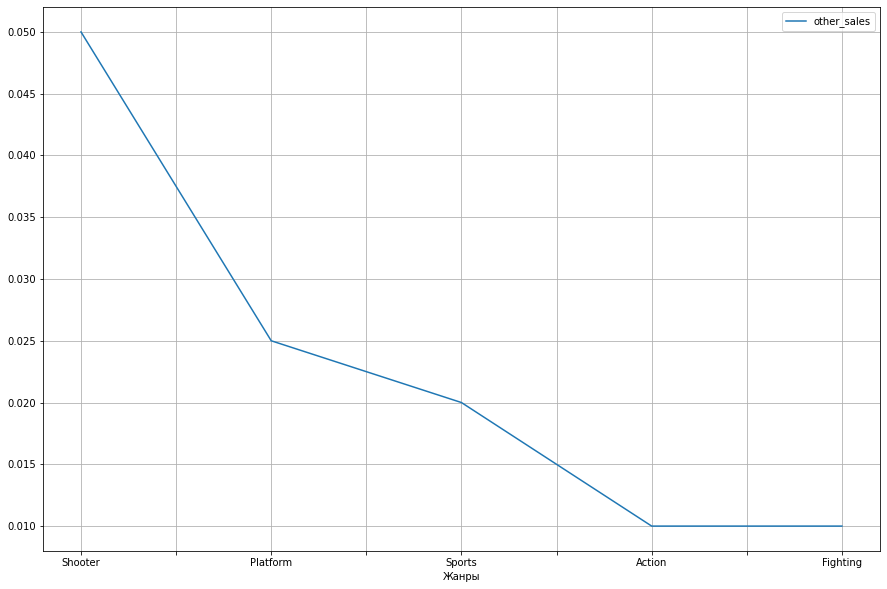

In [89]:
distribution_top(variable_genre, 'other_sales', variable_label_g)

Как же как и с платформами, у каждой региона свои любимые жанры, **но жанр Shooter можно выделить, т.к. находится в топ 1, а также Platform - топ 2**

## Влияет ли рейтинг ESRB на продажи в отдельном регионе?

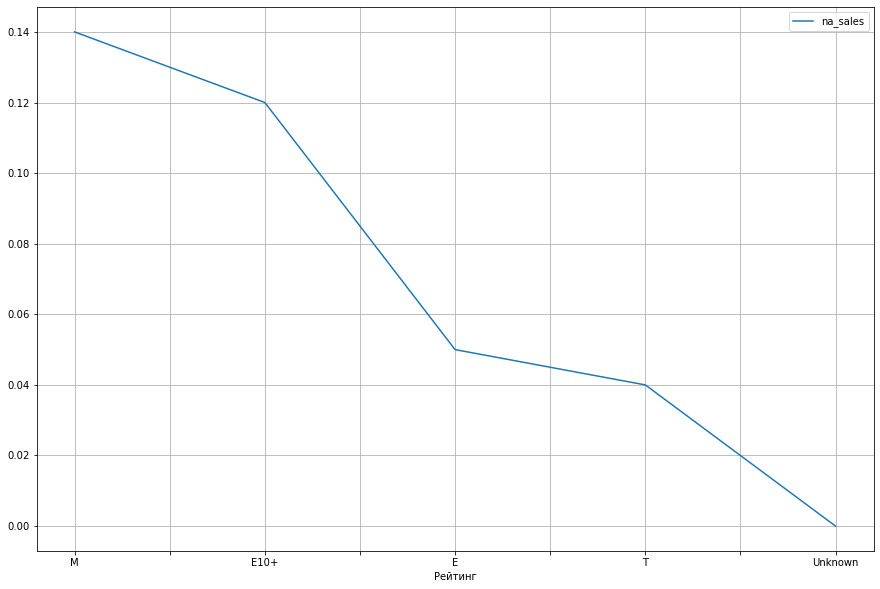

In [92]:
distribution_top(variable_rating, 'na_sales', variable_label_r)

**Для Североамериканского региона наблюдаем картину, что игры с рейтингом М самые популярные.**

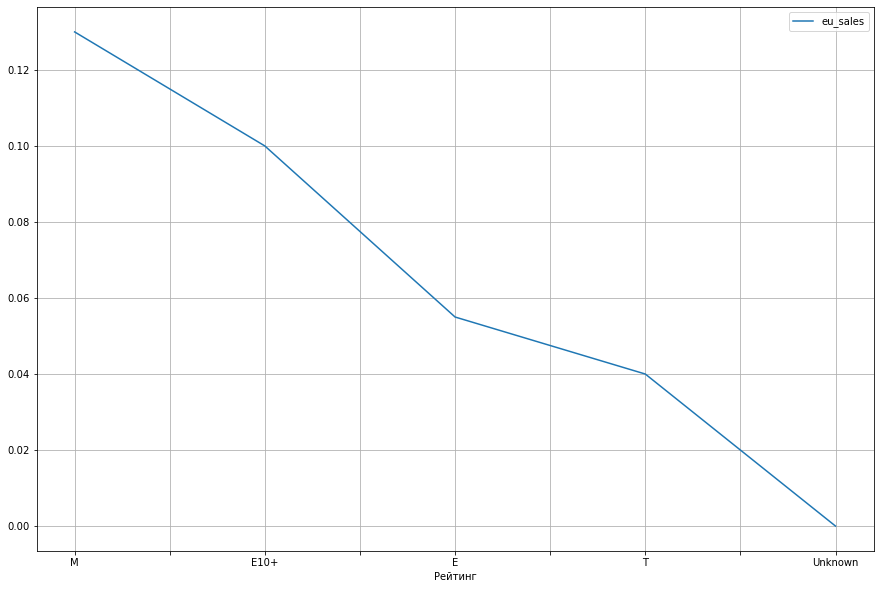

In [93]:
distribution_top(variable_rating, 'eu_sales', variable_label_r)

**Для Европейского региона также игры с рейтингом М самые популярные.**

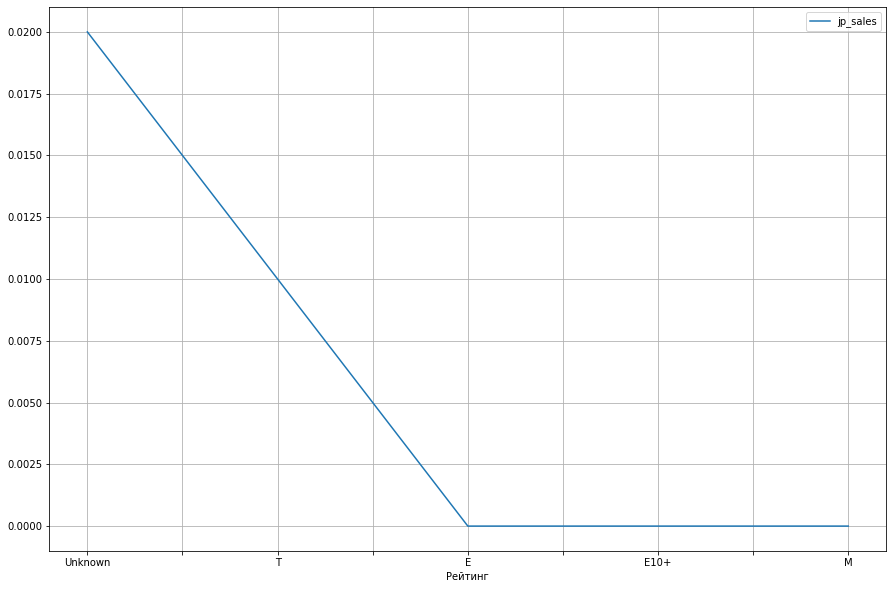

In [94]:
distribution_top(variable_rating, 'jp_sales', variable_label_r)

**Для Японского региона наблюдаем картину, что игры с неизвестным рейтингом самые популярные. Рейтинг М на 4 месте.**

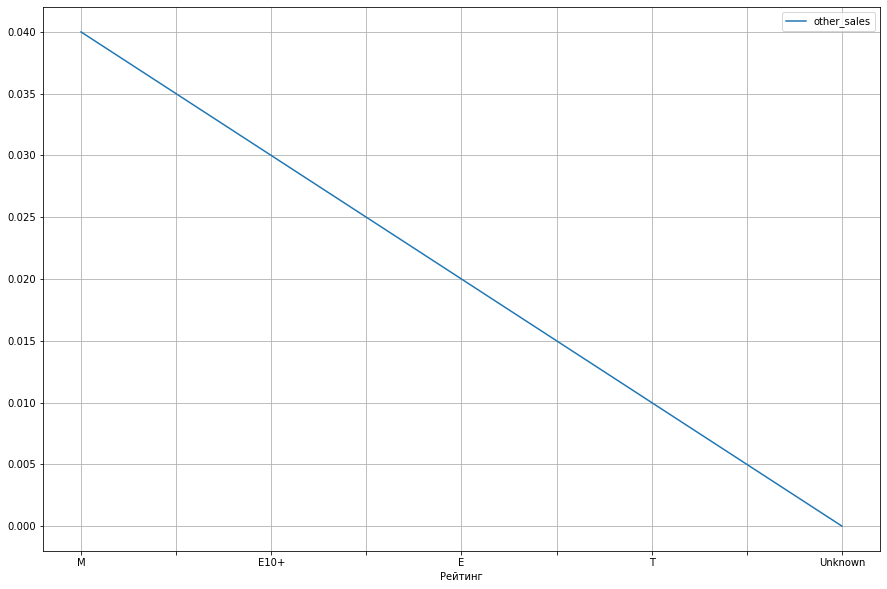

In [95]:
distribution_top(variable_rating, 'other_sales', variable_label_r)

**Для других регионов наблюдаем картину, что игры с рейтингом М самые популярные, также как в Североамериканском и Европейском регионах. Заметим что на втором месте стоит неизвестный рейтинг.**

**Вывод: Да, рейтинг ESRB влияет на продажи в отдельном регионе.**

# Проверка гипотез <a id='5'></a>

Проверка гипотез является важным шагом в аналитике поэтому необходимо провести исследование.

Гипотеза H0: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Альтернативная гипотеза H1: "Средние пользовательские рейтинги платформ Xbox One и PC различаются."

Тест двусторонний, т.к. не сказано что нужно проверить больше или меньше полученное значение. Есть сомнения, что дисперсии у совокупностей одинаковые, поэтому указываем equal_var = False.

In [96]:
ALPHA = .05

In [113]:
def hypothesis(data, index, values_1, values_2):
    parameter_1 = data.loc[data[index] == values_1]
    parameter_2 = data.loc[data[index] == values_2]

    parameter_1 = parameter_1['user_score']
    parameter_2 = parameter_2['user_score']

    results = st.ttest_ind(
        parameter_1, 
        parameter_2)
    
    pvalue_ = round(results.pvalue, 2)

    print(f'p-значение: \033[1m {pvalue_} \033[0m')

    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу") 
        
    mean_1 = round(parameter_1.mean(), 2)
    mean_2 = round(parameter_2.mean(), 2)
    
    print(' ')    
    print(f'Среднее пользовательские рейтинги {values_1}: \033[1m{mean_1}\033[0m')
    print(f'Среднее пользовательские рейтинги {values_2}: \033[1m{mean_2}\033[0m') 

In [114]:
hypothesis(current_period, 'platform', 'XOne', 'PC')

p-значение:  0.18 
Не получилось отвергнуть нулевую гипотезу
 
Среднее пользовательские рейтинги XOne: 4.54
Среднее пользовательские рейтинги PC: 4.98


На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы. **Содержательный вывод: средние пользовательские рейтинги платформ Xbox One и PC различаются.**

Гипотеза H0: "Средние пользовательские рейтинги жанров Action и Sports одинаковые." Альтернативная гипотеза H1: "Средние пользовательские рейтинги жанров Action и Sports разные."

In [115]:
hypothesis(current_period, 'genre', 'Action', 'Sports')

p-значение:  0.02 
Отвергаем нулевую гипотезу
 
Среднее пользовательские рейтинги Action: 2.99
Среднее пользовательские рейтинги Sports: 3.66


На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативы. **Содержательный вывод: средние пользовательские рейтинги жанров Action и Sports одинаковые.**

## Общий вывод <a id='6'></a>

Проведено исследование по интернет-магазину «Стримчик», который продаёт по всему миру компьютерные игры. 

1. Пик количества продаж за приходится на 2006 - 2007 год.


2. Платформа PS2 за все время смогла продать 1233.56 копий за всему миру и является абсолютным рекордсменом по этому показателю.


3. Топ 3 платформы с пиком продаж (год):

    * 2004 год, платформа PS2, 211.81 миллионов копий.
    * 2009 год, платформа Wii, 206.97 миллионов копий.
    * 2010 год, платформа X360, 170.03 миллионов копий.
    
    
4. **На актуальном периоде:** топ 3 платформы с количеством продаж.

    * PS4	314.14 миллионов копий.
    * PS3	181.43 миллионов копий.
    * XOne	159.32 миллионов копий.
    
    
5. Чем выше оценка критиков, тем выше оценка пользователей.


6. У каждого региона своя популярная платформа. 


7. У каждого региона свои любимые жанры, **но жанр Shooter можно выделить, т.к. находится в топ 1 в трех регионах.**


8. Рейтинг ESRB влияет на продажи в отдельном регионе.


9. Средние пользовательские рейтинги платформ Xbox One и PC различаются, а также средние пользовательские рейтинги жанров Action и Sports одинаковые.


**Прогнозы и рекомендации.**

Для того чтобы победить конкурентов в 2017 году необходимо обратить внимание на популярные жанры (по всем регионам) - **Shooter и Platform**. Также можно рассмотреть чуть менее популярный жанр **Sports**. **Крайне рекомендуется** использовать платформу **PS4**, т.к, именно она находится в топ 5 (по всем регионам). Также следует обратить внимание на рейтинг ESRB - **M и E10+**. **При соблюдении этих рекомендации** у компании будет выше шанс **выиграть конкурентов.**